# Framingham Heart Study Dataset

The dataset can be found [here](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset).

The dataset consists of the following parameters:
1. male	
2. age	
3. education	
4. currentSmoker	
5. cigsPerDay	
6. BPMeds
7. prevalentStroke	
8. prevalentHyp	
9. diabetes	
10. totChol	
11. sysBP	
12. diaBP	
13. BMI	
14. heartRate	
15. glucose	
16. TenYearCHD

Based on the medical history, we would like to predict whether the patient would have a Chronic Heart Disease or not in 10 years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Framingham Heart Study Dataset/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.shape

(4240, 16)

Heart Disease do not depend on the Education. We hence drop it.

In [4]:
data.drop('education', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


## Preprocessing

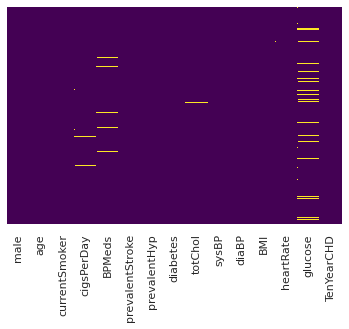

In [5]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [6]:
data['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

We replace the missing values in *Cigarettes Per Day* column with its mode:

In [7]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0])

In [8]:
data['BPMeds'].unique()

array([ 0.,  1., nan])

We replace the missing values in *BPMeds* column with its mode:

In [9]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

In [10]:
data['totChol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

We replace the missing values in *totChol* column with its mean:

In [11]:
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())

In [12]:
data['glucose'].unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

We replace the missing values in *glucose* column with its mean:

In [13]:
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

Check the missing values using *isnull* method; we cannot see smaller missing values on the heatmap.

In [14]:
data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

We first check if the values in the column *BMI* is continuous or discrete:

In [15]:
data['BMI'].value_counts()

22.91    18
23.48    18
22.54    18
22.19    18
25.09    16
         ..
29.14     1
38.43     1
42.15     1
28.10     1
20.91     1
Name: BMI, Length: 1364, dtype: int64

We replace the missing values in *BMI* column with its mean:

In [16]:
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [17]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

We replace the missing values in *heartRate* column with its mean:

In [18]:
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())

In [19]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The missing values are handled.

Check the Target variable:

In [20]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

The dataset is unbalanced. We have to balance the dataset; we will need to check the performance before and after balancing the dataset.

## Split into Features and Targets

In [21]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Split into Test and Train Sets

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_train: ', y_train.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (3392, 14)
Shape x_test:  (848, 14)
Shape y_train:  (3392,)
Shape y_test:  (848,)


## Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## ML Techniques - Unbalanced Dataset





In [24]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_curve, f1_score

### k-Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [26]:
y_pred_kNN = kNN.predict(x_test)

In [27]:
y_pred_kNN_train = kNN.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of training data:  0.8685141509433962
Accuracy of testing data:  0.8325471698113207


In [28]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.17      0.04      0.07       123

    accuracy                           0.83       848
   macro avg       0.51      0.50      0.49       848
weighted avg       0.76      0.83      0.79       848



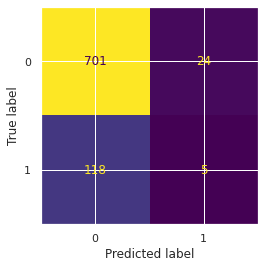

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar=False)

We immediately note that the false negatives is high, and the resulting F1 score is very low. This classifier predicts the '0' class (or the *No heart disease* class) accurately but fail to predict correctly if there actually is a heart disease. 

This goes on to show the importance of balancing the dataset.

### Support Vector Machine

In [30]:
from sklearn.svm import SVC
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train, y_train)
support_vector_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [31]:
y_pred_SVC = support_vector_classifier.predict(x_test)

In [32]:
y_pred_SVC_train = support_vector_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_SVC_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_SVC))

Accuracy of training data:  0.8584905660377359
Accuracy of testing data:  0.8525943396226415


In [33]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



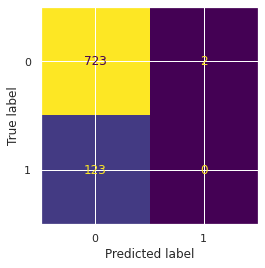

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC, colorbar=False)

The Support Vector Classifier performs worse than kNN in terms of F1-score. We continue with other algorithms.

### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)
Gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [36]:
y_pred_Gaussian = Gaussian.predict(x_test)

In [37]:
y_pred_Gaussian_train = Gaussian.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_Gaussian_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_Gaussian))

Accuracy of training data:  0.8228183962264151
Accuracy of testing data:  0.8301886792452831


In [38]:
print(classification_report(y_test, y_pred_Gaussian))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       725
           1       0.33      0.16      0.22       123

    accuracy                           0.83       848
   macro avg       0.60      0.55      0.56       848
weighted avg       0.79      0.83      0.81       848



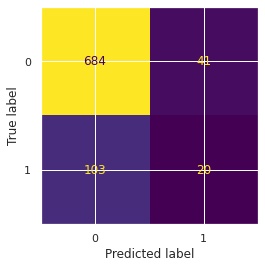

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Gaussian, colorbar=False)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
y_pred_log_reg = log_reg.predict(x_test)

In [42]:
y_pred_log_reg_train = log_reg.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_log_reg_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_log_reg))

Accuracy of training data:  0.8561320754716981
Accuracy of testing data:  0.8561320754716981


In [43]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.53      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.70      0.53      0.53       848
weighted avg       0.81      0.86      0.81       848



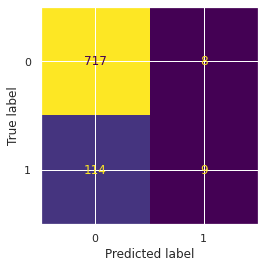

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg, colorbar=False)

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(x_train, y_train)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [46]:
y_pred_DT = DT_classifier.predict(x_test)

In [47]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_DT))

Accuracy of training data:  1.0
Accuracy of testing data:  0.7523584905660378


In [48]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       725
           1       0.20      0.24      0.22       123

    accuracy                           0.75       848
   macro avg       0.53      0.54      0.53       848
weighted avg       0.77      0.75      0.76       848



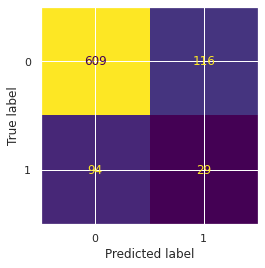

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state = 42)
RF_classifier.fit(x_train, y_train)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [51]:
y_pred_RF = RF_classifier.predict(x_test)

In [52]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of training data: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of testing data: ', accuracy_score(y_test, y_pred_RF))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8608490566037735


In [53]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.78      0.06      0.11       123

    accuracy                           0.86       848
   macro avg       0.82      0.53      0.52       848
weighted avg       0.85      0.86      0.81       848



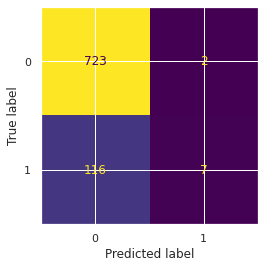

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

# Framingham Heart Study - Balancing the Dataset

We oversample the class using the ADAptive SYNthetic (ADASYN) Sampling Approach: 

In [55]:
from collections import Counter
from imblearn.over_sampling import ADASYN
oversampler = ADASYN()
X, Y = oversampler.fit_resample(x, y)
Counter(Y)

Counter({0: 3596, 1: 3641})

We now have a balanced dataset. We can now split this into training and testing datasets.

## Split into Test and Train Sets

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('Shape X_train: ', X_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape Y_train: ', Y_train.shape)
print('Shape Y_test: ', Y_test.shape)

Shape X_train:  (5789, 14)
Shape X_test:  (1448, 14)
Shape Y_train:  (5789,)
Shape Y_test:  (1448,)


## Standardization

In [57]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

## ML Techniques - Balanced Dataset

### k-Nearest Neighbours

In [58]:
kNN_balanced = KNeighborsClassifier()
kNN_balanced.fit(X_train, Y_train)
kNN_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
Y_pred_kNN = kNN_balanced.predict(X_test)

In [60]:
Y_pred_kNN_train = kNN_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_kNN_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_kNN))

Accuracy of training data:  0.8896182414924857
Accuracy of testing data:  0.8252762430939227


In [61]:
print(classification_report(Y_test, Y_pred_kNN))

              precision    recall  f1-score   support

           0       0.93      0.69      0.80       714
           1       0.76      0.95      0.85       734

    accuracy                           0.83      1448
   macro avg       0.85      0.82      0.82      1448
weighted avg       0.85      0.83      0.82      1448



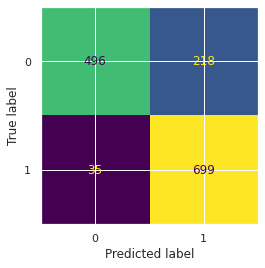

In [62]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_kNN, colorbar=False)

The F1-score of the kNN Classifier has improved drastically but the precision is still not considerably good. We can check the performance of other algorithms.

### Support Vector Machine

In [63]:
support_vector_classifier_balanced = SVC()
support_vector_classifier_balanced.fit(X_train, Y_train)
support_vector_classifier_balanced.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
Y_pred_SVC = support_vector_classifier_balanced.predict(X_test)

In [65]:
Y_pred_SVC_train = support_vector_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_SVC_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_SVC))

Accuracy of training data:  0.7890827431335291
Accuracy of testing data:  0.7769337016574586


In [66]:
print(classification_report(Y_test, Y_pred_SVC))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       714
           1       0.79      0.76      0.77       734

    accuracy                           0.78      1448
   macro avg       0.78      0.78      0.78      1448
weighted avg       0.78      0.78      0.78      1448



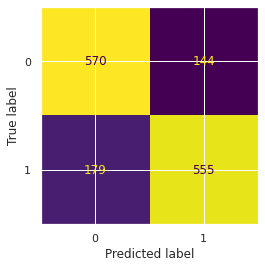

In [67]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_SVC, colorbar=False)

### Naive Bayes

In [68]:
Gaussian_balanced = GaussianNB()
Gaussian_balanced.fit(X_train, Y_train)
Gaussian_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [69]:
Y_pred_Gaussian = Gaussian_balanced.predict(X_test)

In [70]:
Y_pred_Gaussian_train = Gaussian_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_Gaussian_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_Gaussian))

Accuracy of training data:  0.6007946104681292
Accuracy of testing data:  0.5911602209944752


In [71]:
print(classification_report(Y_test, Y_pred_Gaussian))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67       714
           1       0.69      0.35      0.46       734

    accuracy                           0.59      1448
   macro avg       0.63      0.59      0.57      1448
weighted avg       0.63      0.59      0.56      1448



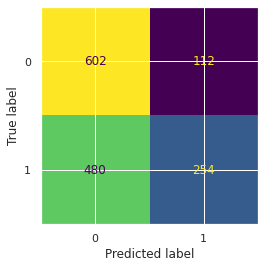

In [72]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_Gaussian, colorbar=False)

### Logistic Regression

In [73]:
log_reg_balanced = LogisticRegression()
log_reg_balanced.fit(X_train, Y_train)
log_reg_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [74]:
Y_pred_log_reg = log_reg_balanced.predict(X_test)

In [75]:
Y_pred_log_reg_train = log_reg_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_log_reg_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_log_reg))

Accuracy of training data:  0.6550354119882535
Accuracy of testing data:  0.6498618784530387


In [76]:
print(classification_report(Y_test, Y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       714
           1       0.65      0.65      0.65       734

    accuracy                           0.65      1448
   macro avg       0.65      0.65      0.65      1448
weighted avg       0.65      0.65      0.65      1448



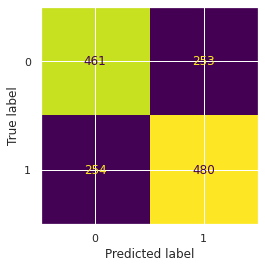

In [77]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_log_reg, colorbar=False)

### Decision Tree Classifier

In [78]:
DT_classifier_balanced = DecisionTreeClassifier(random_state = 42)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [79]:
Y_pred_DT = DT_classifier_balanced.predict(X_test)

In [80]:
Y_pred_DT_train = DT_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_DT_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_DT))

Accuracy of training data:  1.0
Accuracy of testing data:  0.8466850828729282


In [81]:
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       714
           1       0.83      0.88      0.85       734

    accuracy                           0.85      1448
   macro avg       0.85      0.85      0.85      1448
weighted avg       0.85      0.85      0.85      1448



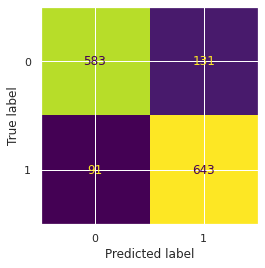

In [82]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_DT, colorbar=False)

### Random Forest Classifier

In [83]:
RF_classifier_balanced = RandomForestClassifier(random_state = 42)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [84]:
Y_pred_RF = RF_classifier_balanced.predict(X_test)

In [85]:
Y_pred_RF_train = RF_classifier_balanced.predict(X_train)
print('Accuracy of training data: ', accuracy_score(Y_train, Y_pred_RF_train))
print('Accuracy of testing data: ', accuracy_score(Y_test, Y_pred_RF))

Accuracy of training data:  1.0
Accuracy of testing data:  0.9171270718232044


In [86]:
print(classification_report(Y_test, Y_pred_RF))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       714
           1       0.93      0.90      0.92       734

    accuracy                           0.92      1448
   macro avg       0.92      0.92      0.92      1448
weighted avg       0.92      0.92      0.92      1448



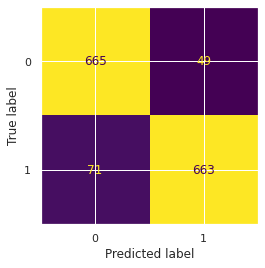

In [87]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_RF, colorbar=False)

# ROC Curve

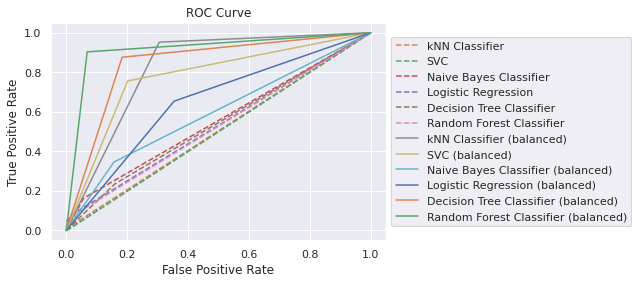

In [88]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN Classifier')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_SVC)
plt.plot(fpr2, tpr2, '--', label='SVC')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_Gaussian)
plt.plot(fpr3, tpr3, '--', label='Naive Bayes Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')

fpr7, tpr7, thresholds = roc_curve(Y_test, Y_pred_kNN)
plt.plot(fpr7, tpr7, '-', label='kNN Classifier (balanced)')
fpr8, tpr8, thresholds = roc_curve(Y_test, Y_pred_SVC)
plt.plot(fpr8, tpr8, '-', label='SVC (balanced)')
fpr9, tpr9, thresholds = roc_curve(Y_test, Y_pred_Gaussian)
plt.plot(fpr9, tpr9, '-', label='Naive Bayes Classifier (balanced)')
fpr10, tpr10, thresholds = roc_curve(Y_test, Y_pred_log_reg)
plt.plot(fpr10, tpr10, '-', label='Logistic Regression (balanced)')
fpr11, tpr11, thresholds = roc_curve(Y_test, Y_pred_DT)
plt.plot(fpr11, tpr11, '-', label='Decision Tree Classifier (balanced)')
fpr12, tpr12, thresholds = roc_curve(Y_test, Y_pred_RF)
plt.plot(fpr12, tpr12, '-', label='Random Forest Classifier (balanced)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

The ROC Curve drastically changes for a balanced dataset in comparison 
to an unbalanced dataset.

The classifier that works best is the Random Forest Classifier, followed by the Decision Tree Classifier.

It is noted that the accuracy score is not a good metric of performance for unbalanced datasets; we must focus on the F1 score, precision and recall.